# CS145 Introduction to Data Mining - Assignment 4  
**Deadline: 11:59PM, May 14, 2025**

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Submission Requirements

* Submit your solutions through GradeScope in BruinLearn.
* Late submissions are allowed up to 24 hours post-deadline with a penalty factor of $\mathbf{1}(t \le 24)e^{-(\ln(2)/12)t}$.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

---

## Outline

- **Part 1: Write-up**

  1. [EM on GMM (Proof Question)](#writeup-q1)

  2. [Set Data (By-Hand Question)](#writeup-q2)

  3. [CNN Convolution (By-Hand Calculation)](#writeup-q3)

  4. [PrefixSpan Question](#writeup-q4)

  5. [Sequence Alignment Question](#writeup-q5)

- **Part 2: Coding**

  6. [Gaussian Mixture Model on Real Data](#coding-q4)

  7. [Implementing the Apriori Algorithm](#coding-q5)

  8. [Implementing a Convolutional Neural Network (CNN)](#coding-q6)



---

# Part 1: Write-up

<a name="writeup-q1"></a>
## 1) EM Derivations for a Gaussian Mixture Model (20 points)

Consider a Gaussian Mixture Model (GMM) with $K$ components, where each component $k$ has parameters $\pi_k, \mu_k, \Sigma_k$. Let the **posterior probability** (responsibility) be:
$$
\gamma_{nk} = p(z_n = k \mid x_n)
= \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}
     {\sum_{k'=1}^{K} \pi_{k'} \mathcal{N}(x_n \mid \mu_{k'}, \Sigma_{k'})},
$$
where
$$
\mathcal{N}(x \mid \mu, \Sigma)
= (2\pi)^{-d/2}
  |\Sigma|^{-1/2}
  \exp\left\{-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)\right\}.
$$

**Question**: Prove the following maximum likelihood estimates (MLE) are obtained for a GMM with soft assignments:
$$
\pi_k = \frac{\sum_n \gamma_{nk}}{\sum_{k}\sum_n \gamma_{nk}},
\quad
\mu_k = \frac{\sum_n \gamma_{nk} x_n}{\sum_n \gamma_{nk}},
\quad
\Sigma_k = \frac{\sum_n \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^\top}{\sum_n \gamma_{nk}}.
$$

In your **proof**, please:

1. Start from the **complete-data log-likelihood** expression (including the assignments $z_n$). (6 points)
2. Show that maximizing w.r.t. each $\pi_k, \mu_k, \Sigma_k$ yields the above formulas when $\gamma_{nk} = p(z_n = k \mid x_n)$. (10 points)
3. Include **sufficient intermediate steps** in your derivation (e.g., partial derivatives, normalizing constraints). (4 points)

**Hint**: You may use standard results for maximizing Gaussian likelihoods, but do show how the soft assignments $\gamma_{nk}$ appear in place of the usual indicator variables.


![My Image](https://drive.google.com/uc?export=view&id=18t-XTdB83S_x2VRYL1BiftZW8pSz3xS-)



---

<a name="writeup-q2"></a>
## 2) Set Data (By-Hand Question) (20 points)

We have the following **5 transactions**:

| TID | Items                   |
|----:|:------------------------|
| 10  | Beer, Nuts, Diaper     |
| 20  | Beer, Coffee, Diaper   |
| 30  | Beer, Diaper, Eggs     |
| 40  | Nuts, Eggs, Milk       |
| 50  | Nuts, Coffee, Diaper, Eggs, Milk |

Assume $\mathrm{minsup} = 50\%$ (i.e., itemsets must appear in at least 50% of transactions).

1. **Frequent 1-Itemsets** (5 points):  
   - Count each individual item's frequency (absolute and relative). Which items are **frequent**?

2. **Candidate 2-Itemsets** (7 points):  
   - Generate all 2-itemset candidates and prune those not meeting $\mathrm{minsup}$. Show your manual support counting.

3. **3-Itemsets** (5 points):  
   - For completeness, if any 3-itemset can be frequent under $\mathrm{minsup} = 50\%$, list them.

4. **Brief Commentary** (3 points):  
   - How many database scans did you perform by hand?  
   - Could you see any **shortcuts** (like the Apriori property) that saved you from enumerating everything?


# **Answer**
1\. Absolute Support: Beer: 3, Nuts: 3, Diaper: 4, Eggs: 3, Coffee: 2, Milk: 2

Relative Support: Beer: 60%, Nuts: 60%, Diaper: 80%, Eggs: 60%, Coffee: 40%, Milk: 40%

Frequent Items: Beer, Nuts, Diaper, Eggs since they pass the minsup threshold

2\. All 2 candidate itemsets and their relative support values: (beer, nuts, 20%), (beer, diaper, 60%), (beer, eggs, 20%), (beer, coffee, 20%), (beer, milk, 0%), (nuts, diaper, 40%), (nuts, eggs, 40%), (nuts, coffee, 20%), (nuts, milk, 40%), (diaper, eggs, 40%), (diaper, coffee, 40%), (diaper, milk, 20%), (eggs, coffee, 20%), (eggs, milk, 40%), (coffee, milk, 20%)

Thus the only frequent 2-item subset is: **(beer, diaper)**

3\. There is **no frequent 3-itemset** that meets the minsup threshold.

4\. **I scanned the database every time I was examining a new itemset. Looking at each indiviual item's support before looking at a superset of that item and another saved me a lot of time because I could more easily identify where that item occurred, and if the other items in the superset occurred then too. The Apriori method definately helped make my scans more efficient, because if an item was not frequent, then I knew its superset could not be frequent which limited the number of scans/checks I had to do**


---

<a name="writeup-q3"></a>
## 3) CNN Convolution (By-Hand Calculation) (20 points)

Consider a **single-channel** (grayscale) 5 $\times$ 5 input image $I$ and a **single** 3 $\times$ 3 filter $F$. Let the (row, column)-indexed pixels in $I$ be:

$$
I = \begin{bmatrix}
1 & 2 & 3 & 2 & 1 \\
2 & 3 & 4 & 3 & 2 \\
3 & 4 & 5 & 4 & 3 \\
2 & 3 & 4 & 3 & 2 \\
1 & 2 & 3 & 2 & 1
\end{bmatrix},
\quad
F = \begin{bmatrix}
1 & 0 & -1 \\
0 & 0 & 0 \\
-1 & 0 & 1
\end{bmatrix}.
$$

We will perform a **valid convolution** (no padding), with **stride = 1**.

**Task**:  
1. Write the formula for the convolution output $O(r,c)$ for a 2D input and kernel (5 points).  
2. Calculate **one** output cell in detail, e.g. $O(1,1)$ (using 1-based indexing for convenience). Show all multiplications and summations (7 points).  
3. Provide the final 3 $\times$ 3 output (8 points).  


# **Answer**
1\. $ O(r,c) = \Sigma_i^{n-1} \Sigma_i^{m-1} K(i, j) ̇̇\cdot I(r-i, c-j)$ Where n is the number of rows in the kernel and m is the number of rows, so in this case m = n = 3. The I repersents the image matrix

2\. Dot product = 1(1) + 2(0) + 3(-1) + 2(0) + 3(0) + 4(0) + 3(-1) + 4(0) 5(1) = 1 - 3 - 3 + 5 = **0**

3\. The final 3x3 output is
$$
O(3,3) = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}.
$$

Here are the simplified calculations for each of the passes of the kernel.
1-3-3+5 = 0, 2-4-2+4 = 0, 3-1-5+3 = 0, 2-4-2+4 = 0, 3-3-3+3 = 0, 4-2-4+2 = 0, 3-5-1+3 = 0, 4-4-2+2 = 0, 5-3-3+1 = 0, thus since all of the dot products are zero, the elements in the final matrix are 0.

---

<a name="writeup-q4"></a>
## 4) PrefixSpan Question (20 points)

**Given** the following small sequence database (with `SID` as sequence IDs), and a minimum support threshold of 2 (i.e., a subsequence must appear in at least 2 sequences to be considered frequent):

| SID | Sequence                      |
|----:|:------------------------------|
|  1  | `<(ab) c (ac) b>`            |
|  2  | `<(a) (bc) (ab)>`            |
|  3  | `<(ab) a (bc) (ac)>`         |
|  4  | `< b (ac) (ab) c>`           |

Each element is shown in parentheses (e.g., `(ab)`), and within an element, items are unordered. For instance, `(ab)` is the same as `(ba)`.

### Tasks:

1. **Frequent Single-Item Sequences** (5 points)
   - Identify all length-1 (single-item) subsequences that meet the minimum support of 2.  
   - List their support counts.

2. **Prefix Projection** (7 points)
   - Pick **one** frequent single-item prefix (e.g., `<a>` or `<b>` — whichever is frequent) and construct its **projected database**. Show **how** you derive these projected sequences (i.e., how you remove the prefix and keep the remainder as the “suffix”).

3. **Frequent 2-Item Sequences** (8 points)
   - Using the projected database from step (2), find **all** possible 2-item extensions of that prefix that are still frequent.  
   - You do *not* need to enumerate every possible prefix in the entire database. Focus on demonstrating the prefix-projection mechanism clearly for **one** prefix.


# **Answer**

1\. Here is a table of all the single item subsequences that meet the minimum support of 2

| seq | support|
|----:|:------------------------------|
|  a  | `4`|
|  b  | `4`|
|  c  | `4`|
| ab  | `4`|
|  ac | `3`|
| bc  | `2`|

2\. using prefix `<a>`, here is its projected database:

| id | seq|
|----:|:-------------|
|  1  | `(_b)c(ac)b`|
|  2  | `_(bc)(ab)`|
|  3  | `(_b)a(bc)(ac)`|
|  4  | `(_c)(ab)c`|

I found these by finding the first occurance of `<a>` in the sequence, putting an underscore in that space and dropping whatever came before that underscore and taking the entire rest of the string. The first three sequences started with `a` so I only took the rest of the sequence after the first character. For the last sequence, since `a` was the second character, I discarded the first character, put an underscore in the place of the first `a` and took the remainder of that sequence to be the projection.

3\. Given the database created in the previous question, the two-item prefix `ac` is also frequent, having a support of 3. Another frequent prefix extension would be `ab`, also having a support of 3

---

<a name="writeup-q5"></a>
## 5) Sequence Alignment Question (20 points)

**Given** two DNA sequences:

$$
X = \text{`GCATGCG`}
$$
$$
Y = \text{`CATTAGA`}
$$

Use the *Needleman-Wunsch* algorithm (global sequence alignment via dynamic programming) with the following scoring scheme:

- **Match**: +1  
- **Mismatch**: -1  
- **Gap**: -1  

(You may use any table size or approach from the lecture notes.)

### Tasks:

1. **Fill Out the DP Table** (8 points)
   - Construct an $(m+1) \times (n+1)$ matrix (where $m$ and $n$ are the lengths of $X$ and $Y$, respectively).  
   - Show how you compute each cell $F(i,j)$ by taking the maximum of:
     1. $F(i-1, j) + (\text{gap})$,  
     2. $F(i, j-1) + (\text{gap})$,  
     3. $F(i-1, j-1) + s(x_i, y_j)$,  
     where $s(x_i, y_j)$ is +1 if $x_i$ and $y_j$ match, and -1 otherwise.

2. **Backtracking** (7 points)
   - Once the table is completed, trace **back** from the bottom-right corner to retrieve **one optimal alignment** of $X$ and $Y$. Show your resulting alignment in a readable form (e.g., with dashes for gaps).

3. **Final Alignment & Score** (5 points)
   - Report the final alignment and the **optimal alignment score** $F(m,n)$.


# Answer
|   |    | C  | A  | T  | T  | A  | G  | A  |
| - | -- | -- | -- | -- | -- | -- | -- | -- |
|   | 0  | -1 | -2 | -3 | -4 | -5 | -6 | -7 |
| G | -1 | -1 | -2 | -3 | -4 | -5 | -6 | -7 |
| C | -2 | 1  | 0  | -1 | -2 | -3 | -4 | -5 |
| A | -3 | 0  | 2  | 1  | 0  | -1 | -2 | -3 |
| T | -4 | -1 | 1  | 3  | 2  | 1  | 0  | -1 |
| G | -5 | -2 | 0  | 2  | 2  | 1  | 2  | 1  |
| C | -6 | -3 | -1 | 1  | 1  | 3  | 1  | 0  |
| G | -7 | -4 | -2 | 0  | 0  | 2  | 4  | 3  |

Here are some examples of how I calculated this, the first row is -1 to -7 since there is a blank space (which is a mismatch) and same for the first column. Then, going diagonally from the first entry, C and G are not a match os subtract 1. G and A are not a match so subtract 1 for the next entry. Keep going this for all three directions adjacent to a square, taking the maxium value for that sqaure's value.

Going diagonally from the bottom rightmost square (end of both sequences) to the top (beginning of both), we will go along directly diagonally and then up one square to get the following alignment

X: G C A T G C G

     | | |     |
     
Y: - C A T T A G A

Thus we get -7 + 4 = -3 as the final score.

---

# Part 2: Coding

Below are three coding assignments. You can implement them in a single Jupyter notebook or separate ones. **Please include** any textual explanations and visualizations (e.g., plots, confusion matrices) within Markdown cells in your notebook for clarity.

<a name="coding-q4"></a>
## 6) Gaussian Mixture Model on Real Data (20 points)

You will implement (or use a library for) a **Gaussian Mixture Model (GMM)** on the "make_moons" dataset from scikit-learn.

**Tasks**:
1. **Data Loading & Preprocessing** (3 points):
   - Generate the "make_moons" dataset using `sklearn.datasets.make_moons`.
   - The dataset creates two interleaving half-moon shapes, ideal for clustering visualizations.
   - Use parameters: `n_samples=300`, `noise=0.1`, `random_state=42`.
   - Optionally normalize or standardize features.

2. **Model Training** (8 points):
   - Either implement GMM from scratch (using E-step & M-step) **or** use an existing library (e.g., `sklearn.mixture.GaussianMixture`).
   - Try different numbers of components $K$ (e.g., $K=2,3,4$).
   - Experiment with different covariance types ('full', 'tied', 'diagonal', 'spherical').

3. **Analysis & Visualization** (5 points):
   - Plot the data with cluster responsibilities or predicted labels.
   - Visualize cluster boundaries using contour plots.
   - Print or plot the means $\mu_k$ and mixture weights $\pi_k$.

4. **Discussion** (4 points):
   - How did you pick the optimal $K$?  
   - How well does GMM handle the non-Gaussian moon-shaped clusters?
   - Compare the performance of different covariance types.

**Starter Code with TODO Blocks**:


<Figure size 1500x1200 with 0 Axes>

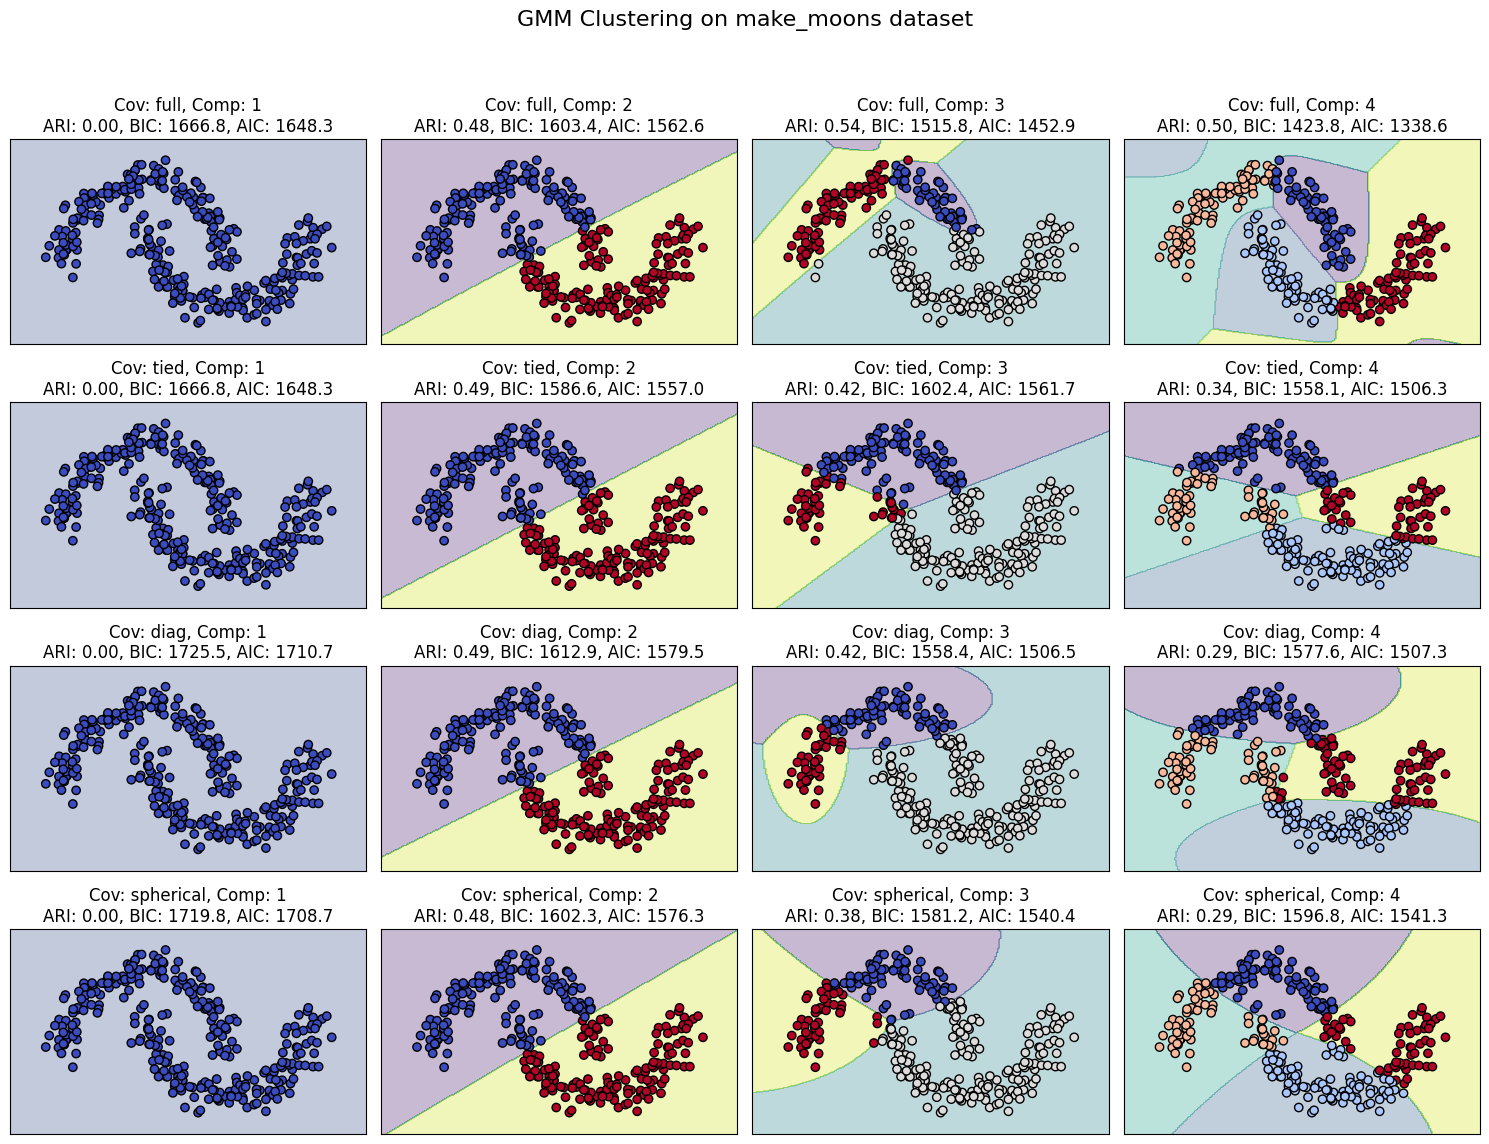

Best GMM configuration: Covariance = full, Components = 3
Best Adjusted Rand Index (ARI): 0.5428


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.colors as colors


# Function to create a mesh grid for visualizing decision boundaries
def plot_decision_boundaries(X, model, ax=None):
    if ax is None:
        ax = plt.gca()

    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # TODO: Predict labels for each point in mesh and visualize decision boundaries
    # Hint: Use model.predict() on the mesh grid points and reshape to match xx shape
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary using a filled contour plot
    ax.contourf(xx, yy, Z, alpha=0.3)

    # Optionally plot the training data on top
    ax.scatter(X[:, 0], X[:, 1], c=model.predict(X), edgecolor='k', cmap=plt.cm.coolwarm)
    return ax

# Generate the make_moons dataset
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply StandardScaler for better GMM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled  # Use scaled data

# Set parameters for model comparison
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_list = [2, 3, 4]

# TODO: Set up a figure for the plots
plt.figure(figsize=(15, 12))

# TODO: Create and train multiple GMM models with different configurations
# Loop through covariance types and number of components
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_list = [1, 2, 3, 4]

# Keep track of the best model based on adjusted_rand_score
best_ari = -1
best_model = None
best_config = None

fig, axes = plt.subplots(len(covariance_types), len(n_components_list), figsize=(15, 12))
fig.suptitle("GMM Clustering on make_moons dataset", fontsize=16)

plot_idx = 0


# TODO: For each configuration:
# 1. Create and train a GMM model
# 2. Get predictions
# 3. Calculate metrics (ARI, BIC, AIC)
# 4. Plot results
# 5. Update best model if needed

# Loop through all configurations
for i, cov_type in enumerate(covariance_types):
    for j, n_components in enumerate(n_components_list):
        # Create and train GMM model
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
        gmm.fit(X)

        # Get predicted labels
        y_pred = gmm.predict(X)

        # Calculate evaluation metrics
        ari = adjusted_rand_score(y_true, y_pred)
        bic = gmm.bic(X)
        aic = gmm.aic(X)

        # Plot the decision boundaries
        ax = axes[i, j]
        plot_decision_boundaries(X, gmm, ax=ax)
        ax.set_title(f'Cov: {cov_type}, Comp: {n_components}\nARI: {ari:.2f}, BIC: {bic:.1f}, AIC: {aic:.1f}')
        ax.set_xticks([])
        ax.set_yticks([])

        # Update best model if this one is better
        if ari > best_ari:
            best_ari = ari
            best_model = gmm
            best_config = (cov_type, n_components)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# TODO: Print details of the best model
print(f"Best GMM configuration: Covariance = {best_config[0]}, Components = {best_config[1]}")


# TODO: Create a detailed visualization of the best model
print(f"Best Adjusted Rand Index (ARI): {best_ari:.4f}")


**The best k-value for this dataset was k=3, which was initially surprising to me because I thought that k=2 would perform the best, given that there are two shapes. However, k=3 likely performed the best because of the curved nature of the shapes and the fact that the gaussian distribution was likely unable to accurately model each individual moon, so having multiple overlapping gaussians captured more of the data**

**The moons are not the typical elliptical shape of an individual gaussian, so having multiple gaussians overlapping (in a GMM) solved this issue because they each had different dimensions (ie elongated different amounts with varying radii) allowing them to combine to create more flexible, organic shapes compared to the oval shape of a single gaussian**


**This is likely why the full covariance provided teh best results, as well, because it was able to capture the more complex, non-circule shape that a single Gaussian cannot**


---

<a name="coding-q5"></a>
## 7) Implementing the Apriori Algorithm (20 points)

Implement the **Apriori algorithm** for frequent itemset mining on the "Bakery" dataset.

**Tasks**:
1. **Load the dataset** (3 points):
   - The "Bakery" dataset contains 1,000 transactions from a bakery shop, providing a manageable size for this assignment.
   - You can download it from this URL: https://raw.githubusercontent.com/ngjiawaie/Extended_Bakery_Dataset/master/1000i.csv
   - Each row represents a transaction with three columns: Transaction ID, Item, and Quantity.

2. **Implement Apriori** from scratch (10 points):
   - Generate 1-itemsets and count their frequencies
   - For each k > 1, generate candidate k-itemsets from (k-1)-itemsets
   - Prune candidates using the Apriori property
   - Calculate support for remaining candidates
   - Continue until no frequent itemsets are found

3. **Output** (4 points):
   - Print the **frequent itemsets** discovered (above your chosen minimum support threshold)
   - Generate **association rules** with their confidence/lift metrics

4. **Comment** (3 points):
   - Analyze the most interesting rules you discovered
   - Explain how the minimum support threshold affects your results

**Starter Code (Apriori)**:

Loading Bakery dataset...
File not found: 1000i.csv. Attempting to download...
Dataset downloaded successfully.

Running Apriori algorithm with min_support=0.02...
Dataset has 1000 transactions with 5 unique items.

Frequent Itemsets:
Found 31 frequent itemsets in total

Generating association rules with min_confidence=0.5, min_lift=1.1...

Generating visualizations...


<ipython-input-3-38afca77883d>:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support, y=items, palette="viridis")


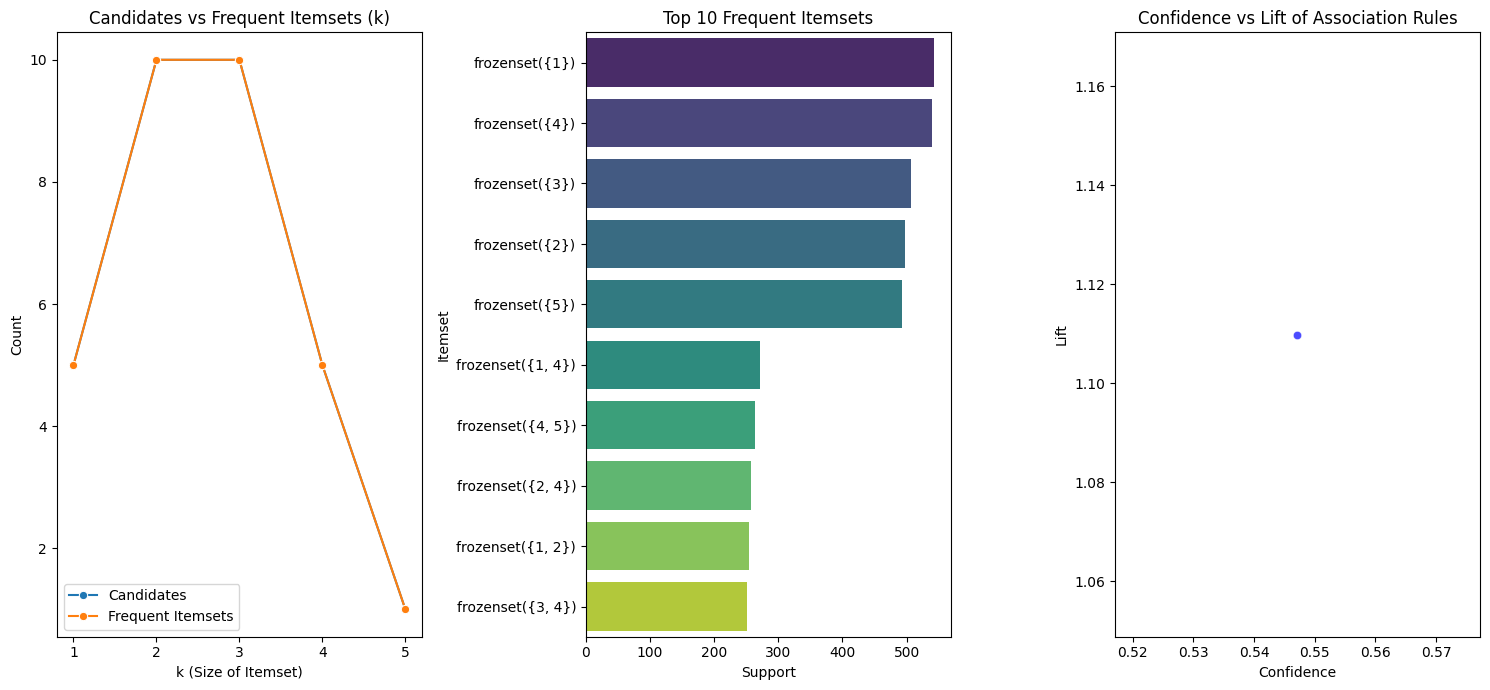


----- Your Analysis Goes Here -----


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Load the Bakery dataset
def load_bakery_dataset(filepath):
    """
    Load the Bakery dataset from a CSV file.
    Returns a list of transactions, where each transaction is a list of items.
    """
    try:
        # Try to load from local file first
        df = pd.read_csv(filepath, header=None, names=['TransactionID', 'Item', 'Quantity'])
    except FileNotFoundError:
        # If file not found, download it
        print(f"File not found: {filepath}. Attempting to download...")
        url = "https://raw.githubusercontent.com/ngjiawaie/Extended_Bakery_Dataset/master/1000i.csv"
        response = requests.get(url)
        if response.status_code == 200:
            content = StringIO(response.text)
            df = pd.read_csv(content, header=None, names=['TransactionID', 'Item', 'Quantity'])
            print(f"Dataset downloaded successfully.")
            # Save the file locally for future use
            with open(filepath, 'w') as f:
                f.write(response.text)
        else:
            raise Exception(f"Failed to download dataset: Status code {response.status_code}")

    # Group by TransactionID and collect items into lists
    transactions = df.groupby('TransactionID')['Item'].apply(list).tolist()

    return transactions, df

def generate_candidates(frequent_itemsets_k_minus_1, k):
    """
    Generate candidate k-itemsets from frequent (k-1)-itemsets
    """
    candidates = set()

    # TODO: Implement candidate generation
    # For k=2, generate pairs from individual items
    # For k>2, use the apriori principle: Two (k-1)-itemsets can be joined if they share k-2 items
    frequent_itemsets_list = list(frequent_itemsets_k_minus_1)

    for i in range(len(frequent_itemsets_list)):
        for j in range(i + 1, len(frequent_itemsets_list)):
            # Join step: try to merge two sets
            l1 = list(frequent_itemsets_list[i])
            l2 = list(frequent_itemsets_list[j])
            l1.sort()
            l2.sort()

            # If first k-2 items are the same, join the sets
            if l1[:k-2] == l2[:k-2]:
                union_set = frequent_itemsets_list[i] | frequent_itemsets_list[j]
                if len(union_set) == k:
                    candidates.add(frozenset(union_set))
    return candidates

def prune_candidates(candidates, frequent_itemsets_k_minus_1, k):
    """
    Prune candidate k-itemsets using the Apriori property:
    All subsets of a frequent itemset must also be frequent
    """
    pruned_candidates = set()

    # TODO: Implement candidate pruning
    # Generate all (k-1)-sized subsets of candidates
    # Keep candidate only if all its (k-1)-subsets are frequent
    pruned_candidates = set()

    for candidate in candidates:
        all_subsets_frequent = True
        for subset in combinations(candidate, k - 1):
            if frozenset(subset) not in frequent_itemsets_k_minus_1:
                all_subsets_frequent = False
                break
        if all_subsets_frequent:
            pruned_candidates.add(candidate)
    return pruned_candidates

def count_itemsets_support(transactions, candidates):
    """
    Count the support for each candidate itemset
    """
    support_count = defaultdict(int)

    # TODO: Implement support counting
    # Count occurrences of each candidate in all transactions
    support_count = defaultdict(int)

    for transaction in transactions:
        for candidate in candidates:
            if candidate.issubset(transaction):
                support_count[candidate] += 1
    return support_count

def apriori(transactions, min_support):
    """
    Implement the Apriori algorithm

    Parameters:
    - transactions: List of transactions, where each transaction is a list of items
    - min_support: Minimum support threshold (between 0 and 1)

    Returns:
    - A dictionary of frequent itemsets with their support values
    """
    # Get unique items in the dataset
    unique_items = set()
    for transaction in transactions:
        for item in transaction:
            unique_items.add(item)

    print(f"Dataset has {len(transactions)} transactions with {len(unique_items)} unique items.")

    # Generate 1-itemsets
    itemsets = {frozenset([item]): 0 for item in unique_items}

    # TODO: Count support for 1-itemsets
    # Iterate through transactions and count occurrences of each item
    for transaction in transactions:
        transaction_set = set(transaction)
        for item in itemsets:
            if item.issubset(transaction_set):
                itemsets[item] += 1

    # Get frequent 1-itemsets
    min_count = min_support * len(transactions)
    frequent_itemsets = {k: v for k, v in itemsets.items() if v >= min_count}

    # TODO: Implement the main Apriori loop
    # Start with k=2 and repeat until no more frequent itemsets are found:
    # 1. Generate k-itemset candidates
    # 2. Prune candidates
    # 3. Count support
    # 4. Filter to get frequent k-itemsets
    # 5. Update result and increment k

    # Track statistics for visualization
    result = dict(frequent_itemsets)  # Initialize with 1-itemsets
    stats = {
        'k': [1],
        'candidates': [len(itemsets)],
        'frequent': [len(frequent_itemsets)]
    }
    k = 2
    current_frequent_itemsets = set(frequent_itemsets.keys())

    while current_frequent_itemsets:
        candidates = generate_candidates(current_frequent_itemsets, k)
        candidates = prune_candidates(candidates, current_frequent_itemsets, k)
        candidate_counts = count_itemsets_support(transactions, candidates)
        current_frequent_itemsets = {
            itemset for itemset, count in candidate_counts.items() if count >= min_count
        }
        if current_frequent_itemsets:
            for itemset in current_frequent_itemsets:
                result[itemset] = candidate_counts[itemset]

            stats['k'].append(k)
            stats['candidates'].append(len(candidates))
            stats['frequent'].append(len(current_frequent_itemsets))

        k += 1
    return result, stats

def generate_association_rules(frequent_itemsets, transactions, min_confidence, min_lift=1.0):
    """
    Generate association rules from frequent itemsets

    Parameters:
    - frequent_itemsets: Dictionary of frequent itemsets with their support
    - transactions: List of transactions
    - min_confidence: Minimum confidence threshold (between 0 and 1)
    - min_lift: Minimum lift threshold (greater than or equal to 1.0)

    Returns:
    - List of rules as tuples (antecedent, consequent, support, confidence, lift)
    """
    rules = []
    total_transactions = len(transactions)

    for itemset, support in frequent_itemsets.items():
        if len(itemset) < 2:  # Skip itemsets with only one item
            continue

        # Generate all possible non-empty subsets of itemset
        for size in range(1, len(itemset)):
            for antecedent in combinations(itemset, size):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent  # The rest is the consequent

                # Calculate support, confidence, and lift
                support_antecedent = frequent_itemsets.get(antecedent, 0) / total_transactions
                support_consequent = frequent_itemsets.get(consequent, 0) / total_transactions
                support_union = support / total_transactions

                if support_antecedent == 0:  # Prevent division by zero
                    continue

                # Confidence calculation
                confidence = support_union / support_antecedent

                # Lift calculation
                lift = confidence / support_consequent if support_consequent > 0 else 0

                # Filter by min_confidence and min_lift
                if confidence >= min_confidence and lift >= min_lift:
                    rules.append((antecedent, consequent, support_union, confidence, lift))

    # Sort the rules by lift (descending order)
    return sorted(rules, key=lambda x: x[4], reverse=True)

    # TODO: Implement association rule generation
    # 1. Consider only itemsets with at least 2 items
    # 2. For each itemset, generate all possible non-empty proper subsets as antecedents
    # 3. Calculate support, confidence, and lift for each rule
    # 4. Filter rules based on min_confidence and min_lift
    # 5. Sort rules by lift (descending)


def visualize_results(stats, frequent_itemsets, rules):
    """
    Visualize the results of the Apriori algorithm
    """
    # Create a figure with subplots
    plt.figure(figsize=(15, 7))

    # TODO: Implement visualization
    # 1. Plot statistics (candidates and frequent itemsets vs k)
    # 2. Plot top frequent items
    # 3. Visualize rules if any were found

    # 1. Plot statistics (candidates and frequent itemsets vs k)
    plt.subplot(1, 3, 1)
    sns.lineplot(x=stats['k'], y=stats['candidates'], label='Candidates', marker='o')
    sns.lineplot(x=stats['k'], y=stats['frequent'], label='Frequent Itemsets', marker='o')
    plt.title("Candidates vs Frequent Itemsets (k)")
    plt.xlabel("k (Size of Itemset)")
    plt.ylabel("Count")
    plt.legend()

    # 2. Plot top frequent items
    plt.subplot(1, 3, 2)
    sorted_itemsets = sorted(frequent_itemsets.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 itemsets
    items, support = zip(*[(str(itemset), support) for itemset, support in sorted_itemsets])
    sns.barplot(x=support, y=items, palette="viridis")
    plt.title("Top 10 Frequent Itemsets")
    plt.xlabel("Support")
    plt.ylabel("Itemset")

    # 3. Visualize rules if any were found
    if rules:
        plt.subplot(1, 3, 3)
        confidences = [rule[3] for rule in rules]  # Confidence values
        lifts = [rule[4] for rule in rules]  # Lift values
        sns.scatterplot(x=confidences, y=lifts, color="b", alpha=0.7)
        plt.title("Confidence vs Lift of Association Rules")
        plt.xlabel("Confidence")
        plt.ylabel("Lift")

    plt.tight_layout()
    plt.savefig('apriori_visualization.png')
    plt.show()

def main():
    # Load the Bakery dataset
    print("Loading Bakery dataset...")
    transactions, bakery_df = load_bakery_dataset("1000i.csv")

    # Set parameters
    min_support = 0.02  # 2% minimum support
    min_confidence = 0.5  # 50% minimum confidence
    min_lift = 1.1  # Minimum lift threshold

    # Run Apriori algorithm
    print(f"\nRunning Apriori algorithm with min_support={min_support}...")
    frequent_itemsets, stats_df = apriori(transactions, min_support)

    # Print frequent itemsets
    print("\nFrequent Itemsets:")
    print(f"Found {len(frequent_itemsets)} frequent itemsets in total")

    # Generate association rules
    print(f"\nGenerating association rules with min_confidence={min_confidence}, min_lift={min_lift}...")
    rules = generate_association_rules(frequent_itemsets, transactions, min_confidence, min_lift)

    # Visualize results
    print("\nGenerating visualizations...")
    visualize_results(stats_df, frequent_itemsets, rules)

    # Add your analysis of the results
    print("\n----- Your Analysis Goes Here -----")
    # TODO: Add analysis of frequent itemsets and rules

if __name__ == "__main__":
    main()


**The most common itemset was {1} by itself, and I thought that it was very interesting how the frequency count briefly increased as the size of the itemset increased, because I would have initially thought that due to the subsequence properly, the smallest itemsets would be the most frequent, but I realized I was interpreting the graph incorrectly. As the minsup threshold lessens, then it becomes easier for candidates to meet that threshold and appear to be freqent so there would be more items to consider**




---

<a name="coding-q6"></a>
## 8) Implementing a Convolutional Neural Network (CNN) (20 points)

Use **PyTorch** (or another deep learning framework) to build a **simple CNN** for classification on a small image dataset (e.g., MNIST-like, CIFAR-10 subset, or any small custom dataset).

**Tasks**:
1. **Data Loading** (3 points):
   - Download or load a small dataset of images (e.g., from `torchvision.datasets`).
   - Split into train and test sets.

2. **Model Definition** (7 points):
   - Define a CNN with at least **one convolutional layer**, one pooling layer, and one fully connected layer at the end.

3. **Training & Evaluation** (7 points):
   - Train for a few epochs, print out training loss.
   - Evaluate on a test set, print out accuracy.

4. **Discussion** (3 points):
   - Did your CNN overfit on a small dataset?
   - (Optional) Experiment with more layers or data augmentation.

**Starter Code**:

Using device: cpu


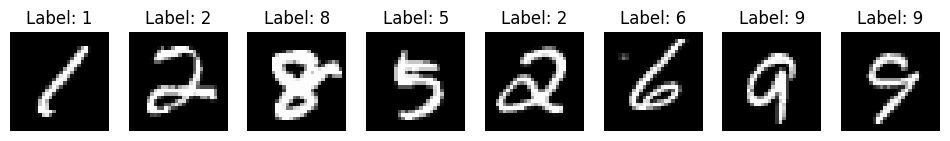

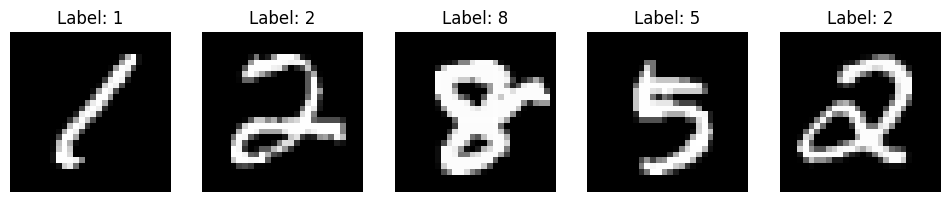

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/5], Train Loss: 0.1791, Train Accuracy: 94.49%, Test Loss: 0.0634, Test Accuracy: 97.88%
Epoch [2/5], Train Loss: 0.0616, Train Accuracy: 98.13%, Test Loss: 0.0501, Test Accuracy: 98.24%
Epoch [3/5], Train Loss: 0.0427, Train Accuracy: 98.67%, Test Loss: 0.0516, Test Accuracy: 98.28%
Epoch [4/5], Train Loss: 0.0300, Train Accuracy: 99.06%, Test Loss: 0.0465, Test Accuracy: 98.38%
Epoch [5/5], Train Loss: 0.0203, Train Accuracy: 99.34%, Test Loss: 0.0528, Test Accuracy: 98.36%


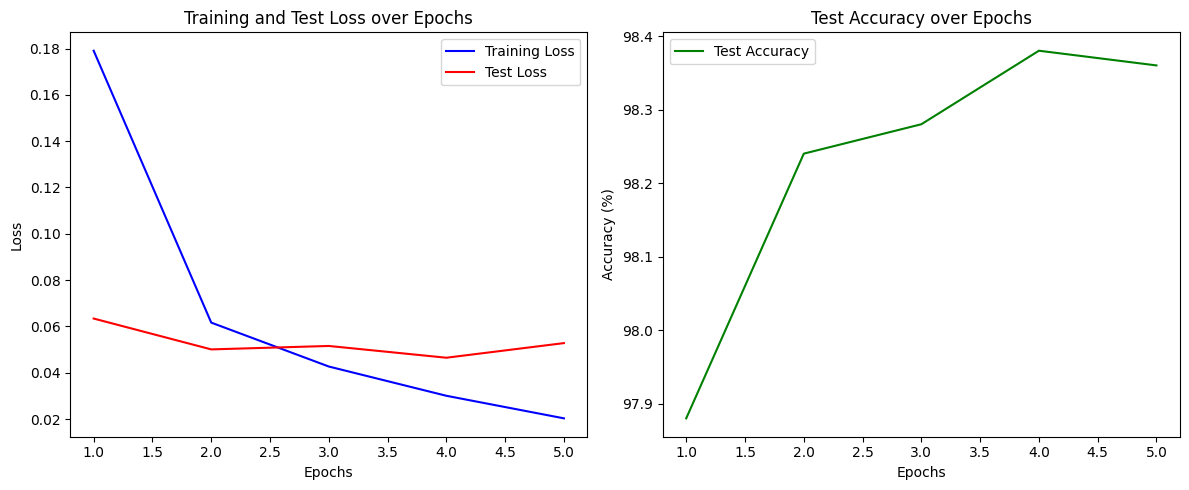


Final accuracy on test set: 98.36%

----- Discussion -----


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # TODO: Define your CNN architecture
        # 1. Add at least one convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # 1 input channel, 32 output channels
        # 2. Add at least one pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # 3. Add at least one fully connected layer
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        # Remember to specify input/output dimensions appropriate for your dataset
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        # Connect the layers defined in __init__
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def load_and_prepare_data():
    """
    Load and prepare the MNIST dataset
    """
    # TODO: Define data transformations and load dataset
    # 1. Set up appropriate transforms (ToTensor, Normalize, etc.)
    # 2. Load training and test datasets
    # 3. Create data loaders with appropriate batch sizes
    # 4. Get a batch of examples for visualization
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # 2. Load training and test datasets
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # 3. Create data loaders with appropriate batch sizes
    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # 4. Get a batch of examples for visualization
    example_data, example_targets = next(iter(train_loader))

    # Visualization of a batch of examples (first 8 images in the batch)
    fig, axes = plt.subplots(1, 8, figsize=(12, 3))
    for i in range(8):
        axes[i].imshow(example_data[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {example_targets[i].item()}")
        axes[i].axis('off')
    plt.show()

    return train_loader, test_loader, example_data, example_targets

def visualize_data(example_data, example_targets):
    """
    Visualize sample images from the dataset
    """
    # TODO: Create a plot to visualize sample images with their labels
    num_samples = min(5, example_data.size(0))  # Number of samples to show
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))

    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(example_data[i].squeeze(), cmap='gray')  # Squeeze to remove the color channel dimension
        ax.set_title(f"Label: {example_targets[i].item()}")
        ax.axis('off')  # Hide the axes for a cleaner plot

    plt.show()

def train_model(model, train_loader, test_loader, num_epochs=5):
    """
    Train the CNN model
    """
    # TODO: Implement model training
    # 1. Define loss function and optimizer
    # 2. Set up training loop with epochs and batches
    # 3. In each epoch:
    #    - Train the model (forward, loss, backward, optimize)
    #    - Evaluate on test set
    #    - Track metrics
    # 4. Return training statistics

    criterion = torch.nn.CrossEntropyLoss()  # Loss function for classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        # 2. Training loop over the batches in the train_loader
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # Clear gradients from previous step

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass (compute gradients)
            loss.backward()

            # Optimize the model's weights
            optimizer.step()

            running_train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)  # Get the predicted class
            correct_train += predicted.eq(targets).sum().item()
            total_train += targets.size(0)

        # Calculate average training loss and accuracy
        avg_train_loss = running_train_loss / total_train
        train_losses.append(avg_train_loss)
        train_accuracy = correct_train / total_train * 100

        # 3. Evaluate on the test set
        model.eval()  # Set the model to evaluation mode (no gradient calculation)
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():  # No need to calculate gradients during evaluation
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                running_test_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                correct_test += predicted.eq(targets).sum().item()
                total_test += targets.size(0)

        # Calculate average test loss and accuracy
        avg_test_loss = running_test_loss / total_test
        test_losses.append(avg_test_loss)
        test_accuracy = correct_test / total_test * 100
        accuracies.append(test_accuracy)

        # Print stats for the current epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_losses, accuracies

def evaluate_model(model, test_loader):
    """
    Evaluate the model on the test set
    """
    # TODO: Implement model evaluation
    # 1. Set model to evaluation mode
    # 2. Calculate loss and accuracy on test set
    # 3. Return metrics

    model.eval()  # Set the model to evaluation mode
    criterion = torch.nn.CrossEntropyLoss()  # Loss function for classification

    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Disable gradient computation to save memory
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute the loss

            running_test_loss += loss.item() * inputs.size(0)  # Accumulate loss
            _, predicted = outputs.max(1)  # Get the predicted class
            correct_test += predicted.eq(targets).sum().item()  # Count correct predictions
            total_test += targets.size(0)  # Total number of samples

    # Calculate the average test loss and accuracy
    test_loss = running_test_loss / total_test
    accuracy = correct_test / total_test * 100
    return test_loss, accuracy

def visualize_results(train_losses, test_losses, accuracies):
    """
    Visualize training results
    """
    # TODO: Create plots to show:
    # 1. Training and test loss over epochs
    # 2. Test accuracy over epochs
    epochs = range(1, len(train_losses) + 1)  # Number of epochs

    # 1. Plot Training and Test Loss over epochs
    plt.figure(figsize=(12, 5))

    # Subplot 1: Losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, test_losses, label='Test Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()

    # 2. Plot Test Accuracy over epochs
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, label='Test Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy over Epochs')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

def main():
    # Load and visualize data
    train_loader, test_loader, example_data, example_targets = load_and_prepare_data()
    visualize_data(example_data, example_targets)

    # Create the model
    model = SimpleCNN().to(device)
    print(model)

    # Train the model
    train_losses, test_losses, accuracies = train_model(model, train_loader, test_loader)

    # Visualize training results
    visualize_results(train_losses, test_losses, accuracies)

    # Final evaluation
    final_loss, final_accuracy = evaluate_model(model, test_loader)
    print(f"\nFinal accuracy on test set: {final_accuracy:.2f}%")

    # Discussion of results
    print("\n----- Discussion -----")
    # TODO: Add your discussion here addressing:
    # 1. Model architecture choice
    # 2. Analysis of results (accuracy, overfitting)
    # 3. Potential improvements

if __name__ == "__main__":
    main()



**My model did not seem to overfit too much on the training data since generally accuracy kept increasing without loss increasing dramatically, however it did still overfit to a certain degree since loss stayed constant and started increasing during the last few epochs**